# Develop method for loading raw data file

Patricia Schuster, 2020

The raw data files live in `/data/raw` and are `.mat` files. 

These data files are custom to the structure that I used to convert raw binary files into `.mat` files during my research. Your files will likely take a different structure. If so, you need to develop a custom function to import your raw signal into numpy arrays with the same structure. Use this as an example. 

In [56]:
import numpy as np
import scipy.io as sio
import os
import sys
import matplotlib.pyplot as plt
import inspect

In [68]:
import plotly.graph_objects as go

In [95]:
sys.path.append('../scripts/')
import scint as scint
import scint_vis as scint_vis

In [2]:
# Automatically reload scripts as I edit them
%load_ext autoreload
%autoreload 2

# Start with the anthracene data

In [28]:
data_path = r'../data/raw'

In [29]:
files = os.listdir(data_path)
files

['.gitkeep',
 'andT_th000_ph065_20150212_155736_signal_raw.mat',
 'README.md',
 'S4DT_th030_ph014_20150928_151727_PTER_1300V_Pos4_signal_raw.mat',
 'Set_1_Test_20150701_115205_Ch1_Stil_316B_1325V_signal_raw.mat',
 'Set_1_Test_20150701_115205_Ch3_Plastic_3901_1375V_signal_raw.mat']

In [30]:
filename = [x for x in files if x[:4] == 'andT'][0]
filename

'andT_th000_ph065_20150212_155736_signal_raw.mat'

# What do these files contain?

This file contains a dictionary of variables and values. Store `signal_raw` to a local variable. 

In [38]:
signal = sio.loadmat(os.path.join(data_path,filename))
signal

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu Jun 18 00:10:43 2015',
 '__version__': '1.0',
 '__globals__': [],
 'signal_raw': array([[-1.37647059, -0.37647059, -1.37647059, ...,  0.62352941,
         -0.37647059, -0.37647059],
        [ 4.31764706, -0.68235294, -0.68235294, ..., -1.68235294,
          0.31764706, -5.68235294],
        [ 1.18823529,  2.18823529,  2.18823529, ...,  5.18823529,
          3.18823529,  1.18823529],
        ...,
        [-0.84705882,  3.15294118,  0.15294118, ...,  2.15294118,
         -2.84705882,  0.15294118],
        [-2.85882353, -0.85882353,  1.14117647, ..., -2.85882353,
         -1.85882353, -8.85882353],
        [ 4.01176471,  3.01176471,  1.01176471, ...,  0.01176471,
          1.01176471, -2.98823529]])}

In [41]:
signal['signal_raw']

array([[-1.37647059, -0.37647059, -1.37647059, ...,  0.62352941,
        -0.37647059, -0.37647059],
       [ 4.31764706, -0.68235294, -0.68235294, ..., -1.68235294,
         0.31764706, -5.68235294],
       [ 1.18823529,  2.18823529,  2.18823529, ...,  5.18823529,
         3.18823529,  1.18823529],
       ...,
       [-0.84705882,  3.15294118,  0.15294118, ...,  2.15294118,
        -2.84705882,  0.15294118],
       [-2.85882353, -0.85882353,  1.14117647, ..., -2.85882353,
        -1.85882353, -8.85882353],
       [ 4.01176471,  3.01176471,  1.01176471, ...,  0.01176471,
         1.01176471, -2.98823529]])

What is the data type of this variable?

In [44]:
type(signal['signal_raw'])

numpy.ndarray

In [45]:
signal_raw = signal['signal_raw']

Perform these commands in one line.

In [46]:
sio.loadmat(os.path.join(data_path,filename))['signal_raw']

array([[-1.37647059, -0.37647059, -1.37647059, ...,  0.62352941,
        -0.37647059, -0.37647059],
       [ 4.31764706, -0.68235294, -0.68235294, ..., -1.68235294,
         0.31764706, -5.68235294],
       [ 1.18823529,  2.18823529,  2.18823529, ...,  5.18823529,
         3.18823529,  1.18823529],
       ...,
       [-0.84705882,  3.15294118,  0.15294118, ...,  2.15294118,
        -2.84705882,  0.15294118],
       [-2.85882353, -0.85882353,  1.14117647, ..., -2.85882353,
        -1.85882353, -8.85882353],
       [ 4.01176471,  3.01176471,  1.01176471, ...,  0.01176471,
         1.01176471, -2.98823529]])

# Investigate variable structure, visualize raw pulses

My data has 384 samples per event. 

In [49]:
signal_raw.shape

(108800, 384)

Isolate a single event with the index.

In [50]:
signal_raw[0,:].shape

(384,)

I functionalized a plotting methods into `scripts/scint_vis.py` for convenience. It offers the option of plotting with  matplotlib or plotly. Use this function to visualize the raw pulses. Start with just one. 

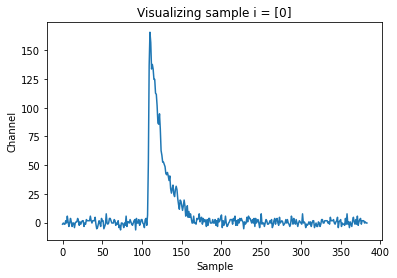

In [105]:
i_values = [0]
fig = scint_vis.plot_raw_pulses(signal_raw, i_values) # Default to matplotlib

Look at 100 raw pulses. 

In [106]:
i_values = np.arange(100)

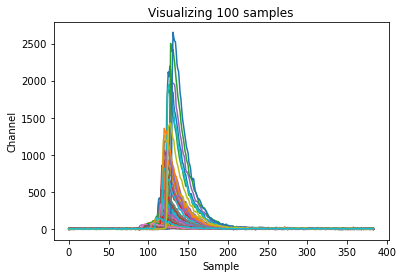

In [107]:
fig = scint_vis.plot_raw_pulses(signal_raw, i_values) # Default to matplotlib

In [108]:
fig = scint_vis.plot_raw_pulses(signal_raw, i_values, plot_with='plotly') # Opt for plotly
fig.show()

# Functionalize `scint.load_signal_raw()`

This is pretty straight forward. Let's formalize it into a function for convenience. 

In [102]:
print(inspect.getsource(scint.load_signal_raw))

def load_signal_raw(filepath):
    """
    Load data following the structure of the demo data provided in this repo. Each file is a `.mat` file containing a dictionary with the variable `signal_raw`. 
    
    Modify as needed for the structure of your data file. 
    
    Parameters
    ----------
    filepath : str
        Path to the raw data file
        
    
    Returns
    -------
    signal_raw : ndarray
        2-dimensional array of signal, may be raw or tot (baseline-subtracted)
        Shape = (# pulses, # samples)
        Pulse n: signal[n,:]    
    """
    signal_raw = sio.loadmat(filepath)['signal_raw']
    return signal_raw



In [103]:
print(data_path)
print(filename)
print(os.path.join(data_path,filename))

../data/raw
andT_th000_ph065_20150212_155736_signal_raw.mat
../data/raw\andT_th000_ph065_20150212_155736_signal_raw.mat


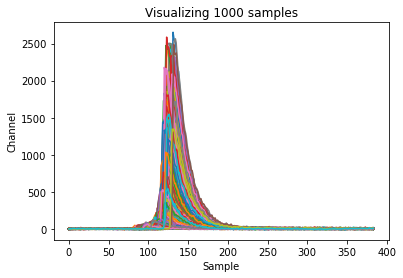

In [104]:
signal_raw = scint.load_signal_raw(os.path.join(data_path,filename))
fig = scint_vis.plot_raw_pulses(signal_raw, np.arange(1000)) # Default to matplotlib

This looks great. Move on to developing calculations of `L` and `S` values. 